In [1]:
#%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import scipy as sp
import scipy.io as sp_io
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
import seaborn as sns
from matplotlib.colors import ListedColormap
colours=sns.color_palette('colorblind', 10)
my_cmap = ListedColormap(colours)


## The ESM4 data

In [2]:
import sys,os

imgdirHistoTP = "TP_png_Basemap_historical_ESM4"
imgdir1prctTP = "TP_png_Basemap_1prctCO2TP_ESM4"
imgdirabrupt4Co2TP = "TP_png_Basemap_abrupt4prctCO2TP_ESM4"

#
if not os.path.exists(imgdirHistoTP):
    os.makedirs(imgdirHistoTP)
if not os.path.exists(imgdir1prctTP):
    os.makedirs(imgdir1prctTP)
if not os.path.exists(imgdirabrupt4Co2TP):
    os.makedirs(imgdirabrupt4Co2TP)


In [3]:
grid=np.load('/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/GFDL-ESM4/GFDL-ESM4_Ofx_lat_lon_deptho.npz')
lat = grid['lat'][:]
lon = grid['lon'][:]
H = grid['deptho'][:][0]

In [4]:
lat.shape

(576, 720)

In [5]:
#IPSLpredictHist = np.load("/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/bathm_lat_lon.npz")
#lat=IPSLpredictHist["x"]
#lon=IPSLpredictHist["y"]
#H = IPSLpredictHist["z"]

In [6]:
H.shape

(576, 720)

In [7]:
ESM4Hist = np.load('/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/GFDL-ESM4/GFDL-ESM4-Historical-187201-201112-EnsembleMLP.npy')

In [8]:
ESM41pct = np.load('/home/jovyan/DNN4Cli/figures/ESM4/ESM4-1pctCO2-000101-014012-EnsembleMLP.npy')

In [9]:
ESM4abrupt4pct = np.load('/home/jovyan/DNN4Cli/figures/ESM4/ESM4-abrupt4xCO2-000101-014012-EnsembleMLP.npy')

In [10]:
ESM4Hist.shape,ESM41pct.shape, ESM4abrupt4pct.shape, H.shape

((7, 576, 720), (7, 576, 720), (7, 576, 720), (576, 720))

In [11]:
listyears = ["1872","1891","1892","1911","1912","1931","1932","1951","1952","1971","1972","1991","1992","2011"]

In [12]:

def makeFig(data, cMin, cMax, cStep, title, ColMap, saveName):
    plt.figure(figsize=(15,15))
    #lons = lon[:,1]
    #lats = lat[1,:]
    #llons, llats = np.roll(lon,100,axis=1),lat
    fig = plt.figure()
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='kav7',lon_0=-60,resolution='l')
    im1 = m.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=ColMap,latlon=True, extend='both')
    m.drawmapboundary(fill_color='0.9')
    m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,1])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[1,1,0,1])
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title(title)
    cb = m.colorbar(im1,"right", size="5%", pad="9%")
    cb.set_ticks([-0.5,0.5, 1.5, 2.5, 3.5, 4.5])
    cb.set_ticklabels(["MD", "S-SV", "N-Sv", "TR", "SO", "NL"])
    #plt.savefig(saveName, format='png', dpi=500, bbox_inches='tight')
    
def makeFigZoomBathymetry(data,cMin, cMax, cStep, title, saveName, label, labelSpot,c= 1, llcrnrlon=-65, urcrnrlon=-20, llcrnrlat=35, urcrnrlat=65):
    fig = plt.figure(figsize=(15,15))
    map2 = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat, lon_0=-90, projection='merc', resolution='l')
    map2.drawmapboundary(fill_color='0.9')
    map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
    map2.drawcoastlines()
    map2.fillcontinents()
    map2.drawcountries()
    map2.drawparallels(np.arange(-90.,99.,5.),labels=[1,1,0,1], fontsize=15)
    map2.drawmeridians(np.arange(-180.,180.,20.),labels=[1,1,0,1], fontsize=15)
    im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)

   
    plt.title(title)
    display(plt.gca().get_ylim())
    #cb = map2.colorbar(im2,"right", size="5%", pad="9%")
    cb = map2.colorbar(im2,"right", size="5%", pad="12%")
    cb.ax.tick_params(labelsize=20) 
    cb.set_ticks([-0.5,0.5, 1.5, 2.5, 3.5, 4.5])
    cb.set_ticklabels(["MD", "S-SV", "N-SV", "TR", "SO", "NL"])
    
    im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
    #plt.clabel(im2,fontsize=14,fmt='%1.1f', inline=1)
    yL=plt.gca().get_ylim()
    xL=plt.gca().get_xlim()
    plt.text(xL[1]*0.01, yL[1]*0.1, label, fontsize=30, size=15, weight='bold', bbox={'facecolor':'white', 'alpha':0.7})
    plt.text(xL[1]*0.02, yL[1]*0.9, labelSpot, fontsize=50, size=40, weight='bold', bbox={'facecolor':'white', 'alpha':0.7})

    plt.savefig(saveName, format='png', dpi=100, bbox_inches='tight')


<ipython-input-14-7cf497a6d8c8>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-14-7cf497a6d8c8>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))


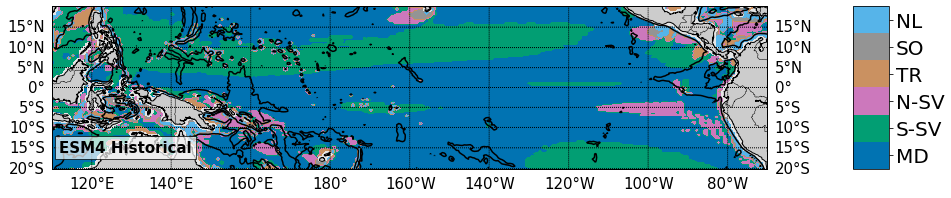

In [26]:
makeFigZoomBathymetry(ESM4Hist[6], -1,6,1,'', 'ESM4_TP_historical'+'.png', str("ESM4 Historical"), '', c=3, llcrnrlon=-250, urcrnrlon=-70, llcrnrlat=-20, urcrnrlat=20)

<ipython-input-14-7cf497a6d8c8>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 1113362.7647636144)

<ipython-input-14-7cf497a6d8c8>:42: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-14-7cf497a6d8c8>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))


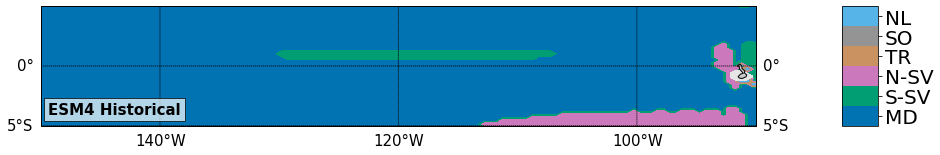

In [17]:
makeFigZoomBathymetry(ESM4Hist[6], -1,6,1,'', 'ESM4_historical'+'.png', str("ESM4 Historical"), '',c=1, llcrnrlon=-150, urcrnrlon=-90, llcrnrlat=-5, urcrnrlat=5)

In [ ]:
for i in range(7):
    makeFigZoomBathymetry(ESM4Hist[i], -1,6,1,'', 'ESM4_basemap_historical_ESM4'+str(listyears[2*i])+str(listyears[2*i+1])+'.png', str("Historical "+listyears[2*i])+"-"+str(listyears[2*i+1]), '',c=1, llcrnrlon=-150, urcrnrlon=-90, llcrnrlat=-5, urcrnrlat=5)
    #plt.savefig('/home/jovyan/DNN4Cli/figures/ESM4/TP_png_Basemap_historical_ESM4/'+str("TP_ESM4His"+listyears[2*i])+str(listyears[2*i+1])+'.png')

In [15]:
listyears1prct = ['0011', '0030', '0031', '0050', '0051', '0070', '0071', '0090', '0091', '0110', '0111', '0130', '0131', '0150']

<ipython-input-19-fc1ba694c09b>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-19-fc1ba694c09b>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-19-fc1ba694c09b>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-19-fc1ba694c09b>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-19-fc1ba694c09b>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-19-fc1ba694c09b>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-19-fc1ba694c09b>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-19-fc1ba694c09b>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-19-fc1ba694c09b>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-19-fc1ba694c09b>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-19-fc1ba694c09b>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-19-fc1ba694c09b>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-19-fc1ba694c09b>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-19-fc1ba694c09b>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))


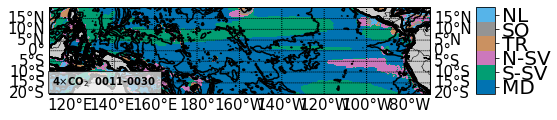

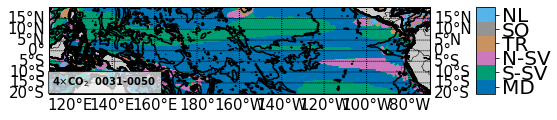

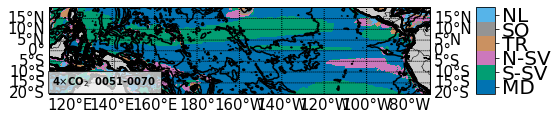

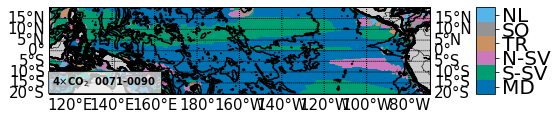

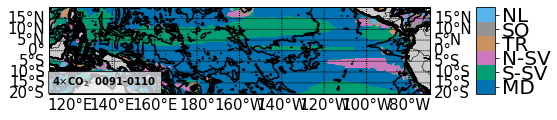

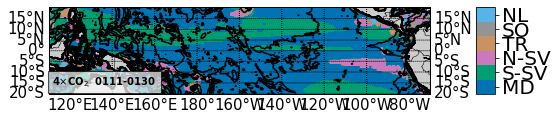

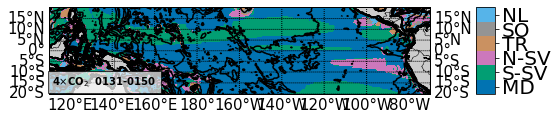

In [22]:
#it has the same list of years as that of 1pct so that's why it wasn't change here
for i in range(7):
    makeFigZoomBathymetry(ESM4abrupt4pct[i], -1,6,1,'', 'ESM4Hist_abrupt4xCO2_basemap'+str(listyears1prct[2*i])+str(listyears1prct[2*i+1])+'.png', str(r'4$\times$CO$_2$  '+listyears1prct[2*i])+"-"+str(listyears1prct[2*i+1]), '',llcrnrlon=-250, urcrnrlon=-70, llcrnrlat=-20, urcrnrlat=20)
    #plt.savefig('/home/jovyan/DNN4Cli/figures/ESM4/TP_png_Basemap_abrupt4prctCO2TP_ESM4/'+str("SO_ESM4-"+listyears1prct[2*i])+str(listyears1prct[2*i+1])+'.png')

In [13]:
natVar1pct=np.zeros(ESM4Hist[0].shape)*np.nan
for n in np.arange(0,8):
    natVar1pct[np.count_nonzero(ESM41pct[4:7] == n, axis = 0)>2]=n

natVar4=np.zeros(ESM4Hist[0].shape)*np.nan
for n in np.arange(0,8):
    natVar4[np.count_nonzero(ESM4abrupt4pct[4:7] == n, axis = 0)>2]=n

<ipython-input-12-7cf497a6d8c8>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 1113362.7647636144)

<ipython-input-12-7cf497a6d8c8>:42: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-12-7cf497a6d8c8>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-12-7cf497a6d8c8>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 1113362.7647636144)

<ipython-input-12-7cf497a6d8c8>:42: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-12-7cf497a6d8c8>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))


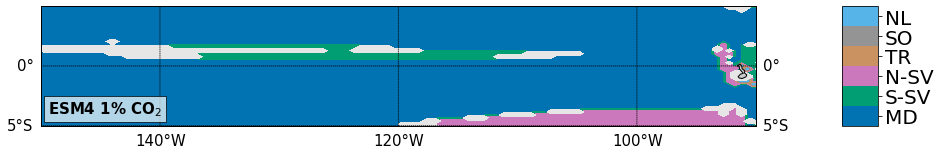

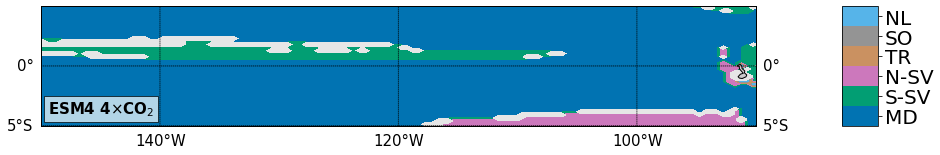

In [14]:
makeFigZoomBathymetry(natVar1pct, -1,6,1,'', 'CESM2_1%CO2_NINO_EnsembleMLP_prez.png', r'ESM4 1% CO$_2$', '', c=1, llcrnrlon=-150, urcrnrlon=-90, llcrnrlat=-5, urcrnrlat=5)

makeFigZoomBathymetry(natVar4, -1,6,1,'', 'CESM2_abrupt4xO2_NINO_EnsembleMLP_prez.png', r'ESM4 4$\times$CO$_2$', '', c=1, llcrnrlon=-150, urcrnrlon=-90, llcrnrlat=-5, urcrnrlat=5)

<ipython-input-12-7cf497a6d8c8>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-12-7cf497a6d8c8>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))
<ipython-input-12-7cf497a6d8c8>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 4540972.768927916)

<ipython-input-12-7cf497a6d8c8>:42: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,c))


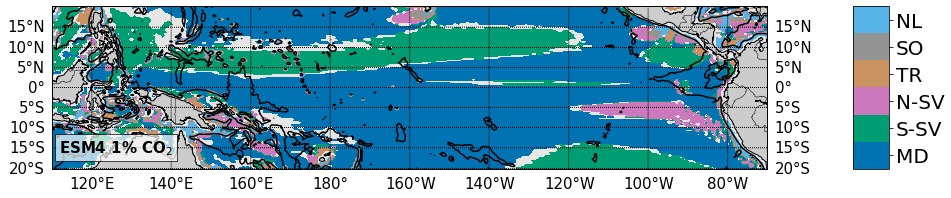

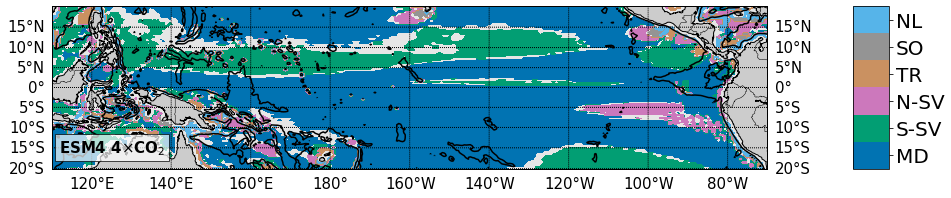

In [15]:
makeFigZoomBathymetry(natVar1pct, -1,6,1,'', 'ESM4_1%CO2__TP.png', r'ESM4 1% CO$_2$', '', c=3, llcrnrlon=-250, urcrnrlon=-70, llcrnrlat=-20, urcrnrlat=20)

makeFigZoomBathymetry(natVar4, -1,6,1,'', 'ESM4_abrupt4xO2_TP.png', r'ESM4 4$\times$CO$_2$', '', c=3, llcrnrlon=-250, urcrnrlon=-70, llcrnrlat=-20, urcrnrlat=20)

## Creating Historical GIF

In [ ]:
import os
import imageio

In [ ]:
png_dir = '/home/jovyan/DNN4Cli/figures/ESM4/TP_png_Basemap_historical_ESM4/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
#imageio.mimsave(png_dir+'TP_png_Basemap_Historical_ESM4.gif', images, fps=1)

## Creating 1%CO2 GIF

In [ ]:
png_dir = '/home/jovyan/DNN4Cli/figures/ESM4/TP_png_Basemap_1prctCO2TP_ESM4/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
#imageio.mimsave(png_dir + 'TP_png_Basemap_1prctCO2_ESM4.gif', images, fps=1)

## Creating abrupt-4xCO2 GIF

In [ ]:
png_dir = '/home/jovyan/DNN4Cli/figures/ESM4/TP_png_Basemap_abrupt4prctCO2TP_ESM4/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
#imageio.mimsave(png_dir + 'TP_png_Basemap_abrupt4prctCO2_ESM4.gif', images, fps=1)